In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
import gc

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [99]:
##### Load data ####
file = '/Users/ketansand/Downloads/Flight_Data/2022/Atlanta.csv'
file_prev = '/Users/ketansand/Downloads/Flight_Data/2021/Atlanta.csv'

data_2022 = pd.read_csv(file)
data_2021 = pd.read_csv(file_prev)

#### only keeping days with delay ########

data_2022 = data_2022[data_2022['DEP_DELAY'] > 0]
data_2021 = data_2021[data_2021['DEP_DELAY'] > 0]

In [100]:
print(len(data_2022), len(data_2021))

119396 97209


In [101]:
delay_time = data_2022['DEP_DELAY'].fillna(0)
data_2022['Date'] = pd.to_datetime(data_2022['FL_DATE'])
data_2022['Day'] = data_2022['Date'].dt.day
data_2022['Month'] = data_2022['Date'].dt.month

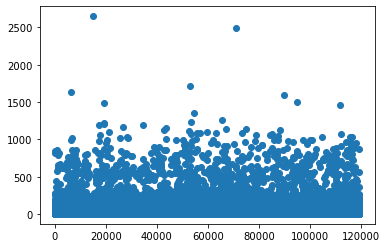

In [102]:
xs = np.arange(1, len(delay_time)+1)
plt.scatter(xs, delay_time)
plt.show()

In [104]:
##### Keeping 70% for training and 30% for test #######
train_len = int(len(delay_time) * .7)
print(train_len)
delay_train = delay_time[:train_len].copy()
delay_test = delay_time[train_len:].copy()

83577


In [44]:
###### Change the test_size depending on your horizon size #########
##### Here our horizon will correpsond to how many flights upto which we want to do a prediction ######
##### So maybe for starters take one year of data and use first 7 months as training and back 5 as 

kfold = TimeSeriesSplit(5, test_size=20000, max_train_size=50000)

In [45]:
###### Not used this ######
for train_index, test_index in kfold.split(delay_time):
    print("TRAIN INDEX:", train_index)
    print("TEST INDEX:", test_index)
    print()
    print()

TRAIN INDEX: [167926 167927 167928 ... 217923 217924 217925]
TEST INDEX: [217926 217927 217928 ... 237923 237924 237925]


TRAIN INDEX: [187926 187927 187928 ... 237923 237924 237925]
TEST INDEX: [237926 237927 237928 ... 257923 257924 257925]


TRAIN INDEX: [207926 207927 207928 ... 257923 257924 257925]
TEST INDEX: [257926 257927 257928 ... 277923 277924 277925]


TRAIN INDEX: [227926 227927 227928 ... 277923 277924 277925]
TEST INDEX: [277926 277927 277928 ... 297923 297924 297925]


TRAIN INDEX: [247926 247927 247928 ... 297923 297924 297925]
TEST INDEX: [297926 297927 297928 ... 317923 317924 317925]




In [105]:
print(data_2022.Date[:train_len])

1        2022-01-01
3        2022-01-01
9        2022-01-01
11       2022-01-01
16       2022-01-01
            ...    
217040   2022-09-08
217042   2022-09-08
217061   2022-09-08
217063   2022-09-08
217065   2022-09-08
Name: Date, Length: 83577, dtype: datetime64[ns]


All the ones below are like trend looking models

[34.64608684 34.64608684 34.64608684 ... 34.64608684 34.64608684
 34.64608684]


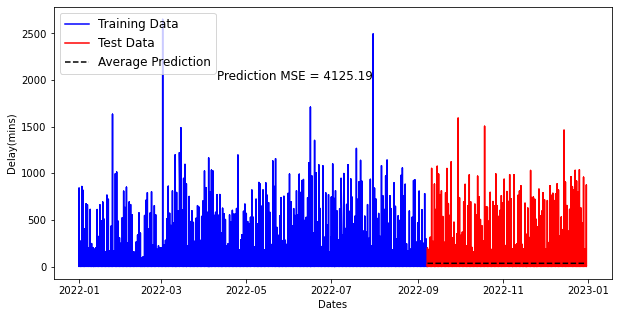

In [108]:
##### Make a baseline prediction #######

##### Here model = mean of delay, do a mse here for each train test split ####

delay_base = delay_train.mean() * np.ones(len(delay_test))
print(delay_base)
plt.figure(figsize=(10, 5))

plt.plot(data_2022.Date[:train_len],
            delay_time[:train_len],
            'b-',
            label="Training Data")

plt.plot(data_2022.Date[train_len:],
            delay_time[train_len:],
            'r-',
            label="Test Data")

plt.plot(data_2022.Date[train_len:],
            delay_base,
            'k--',
            label="Average Prediction")

plt.text(data_2022.Date[train_len],
         2000,
         "Prediction MSE = " + str(np.round(mean_squared_error(delay_time[train_len:],
                                                                  delay_base), 2)),
         fontsize=12)

plt.xlabel("Dates")
plt.ylabel("Delay(mins)")

plt.legend(fontsize=12, loc=2)

plt.show()

[17. 17. 17. ... 17. 17. 17.]


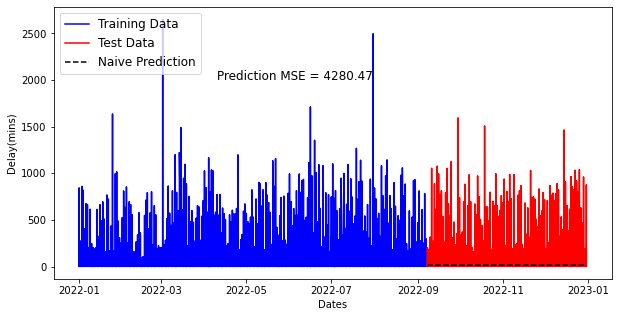

In [109]:
###### Making a naive prediction #########

###### Here model = latest value of delay, do a mse here for each train test split #####

delay_naive = delay_train.values[-1] * np.ones(len(delay_test))
print(delay_naive)

plt.figure(figsize=(10, 5))

plt.plot(data_2022.Date[:train_len],
            delay_time[:train_len],
            'b-',
            label="Training Data")

plt.plot(data_2022.Date[train_len:],
            delay_time[train_len:],
            'r-',
            label="Test Data")

plt.plot(data_2022.Date[train_len:],
            delay_naive,
            'k--',
            label="Naive Prediction")

plt.text(data_2022.Date[train_len],
         2000,
         "Prediction MSE = " + str(np.round(mean_squared_error(delay_time[train_len:],
                                                                  delay_naive), 2)),
         fontsize=12)

plt.xlabel("Dates")
plt.ylabel("Delay(mins)")

plt.legend(fontsize=12, loc=2)

plt.show()

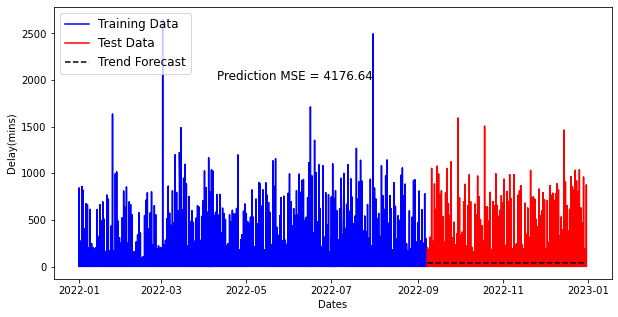

In [110]:
###### Do a simple regression fit to the time series data and see how it gets affected ######
####### model = y = b0 + b1.t + e , do a mse for each train test split ########
####### Don't forget to reshape #######

training_dates = np.arange(1, len(delay_train)+1)
test_dates = np.arange(len(delay_train)+1, len(delay_test) + len(delay_train) + 1)


# test_dates = data_2022.Date[222548:].to_numpy()


reg = LinearRegression()

reg.fit(training_dates.reshape(-1,1), delay_train) #### can convert flight date to something thats numeric, but check anyway

predicted_delay = reg.predict(test_dates.reshape(-1,1))


plt.figure(figsize=(10, 5))

plt.plot(data_2022.Date[:train_len],
            delay_time[:train_len],
            'b-',
            label="Training Data")

plt.plot(data_2022.Date[train_len:],
            delay_time[train_len:],
            'r-',
            label="Test Data")

plt.plot(data_2022.Date[train_len:],
            predicted_delay,
            'k--',
            label="Trend Forecast")

plt.text(data_2022.Date[train_len],
         2000,
         "Prediction MSE = " + str(np.round(mean_squared_error(delay_time[train_len:],
                                                                  predicted_delay), 2)),
         fontsize=12)

plt.xlabel("Dates")
plt.ylabel("Delay(mins)")

plt.legend(fontsize=12, loc=2)

plt.show()


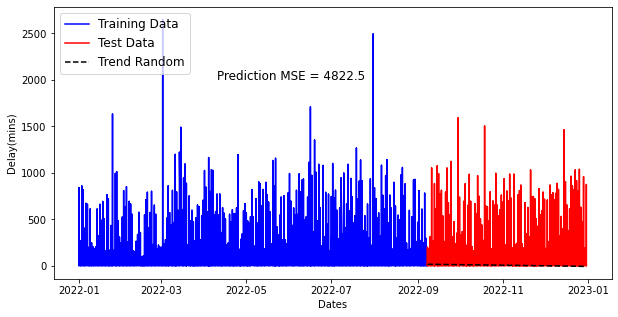

In [111]:
###### Next we do a random walk drift, here we take a difference between delay on two consecutive time ###
##### model = delay.diff().mean() * t, do mse for each train test split ###

beta_hat = delay_train.diff().mean()

delay_pred = delay_train.values[-1] + beta_hat*np.arange(1,len(delay_test) + 1)

plt.figure(figsize=(10, 5))

plt.plot(data_2022.Date[:train_len],
            delay_time[:train_len],
            'b-',
            label="Training Data")

plt.plot(data_2022.Date[train_len:],
            delay_time[train_len:],
            'r-',
            label="Test Data")

plt.plot(data_2022.Date[train_len:],
            delay_pred,
            'k--',
            label="Trend Random")

plt.text(data_2022.Date[train_len],
         2000,
         "Prediction MSE = " + str(np.round(mean_squared_error(delay_time[train_len:],
                                                                  delay_pred), 2)),
         fontsize=12)

plt.xlabel("Dates")
plt.ylabel("Delay(mins)")

plt.legend(fontsize=12, loc=2)

plt.show()

All the ones below will be seasonal variation looking models 

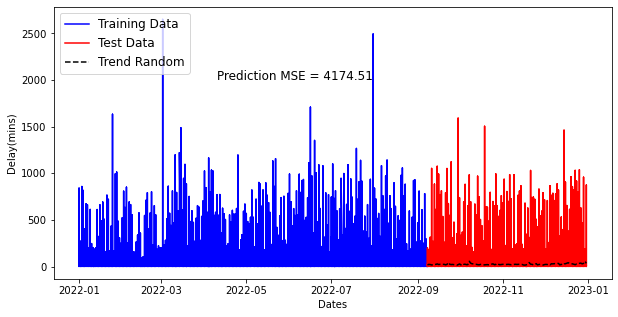

In [181]:
##### Taking daily average for previous year ######

data_2021['Date'] = pd.to_datetime(data_2021['FL_DATE'])


##### getting mean delay for each day ######

df_mean = data_2021.set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')

###### Getting how many flights in every day of 2022 #######

x = data_2022['Date'].value_counts(sort=False, dropna=False)

x = x.sort_index()

mean_vals = []
for i in range(365):
    arr = np.full(x[i], df_mean['DEP_DELAY'][i])
    mean_vals.append(arr.tolist())
    
#### Assigning the mean delay value to each flight ########

delay_pred = [item for sublist in mean_vals for item in sublist]


plt.figure(figsize=(10, 5))

plt.plot(data_2022.Date[:train_len],
            delay_time[:train_len],
            'b-',
            label="Training Data")

plt.plot(data_2022.Date[train_len:],
            delay_time[train_len:],
            'r-',
            label="Test Data")

plt.plot(data_2022.Date[train_len:],
            delay_pred[train_len:],
            'k--',
            label="Trend previous year")

plt.text(data_2022.Date[train_len],
         2000,
         "Prediction MSE = " + str(np.round(mean_squared_error(delay_time[train_len:],
                                                                  delay_pred[train_len:]), 2)),
         fontsize=12)

plt.xlabel("Dates")
plt.ylabel("Delay(mins)")

plt.legend(fontsize=12, loc=2)

plt.show()


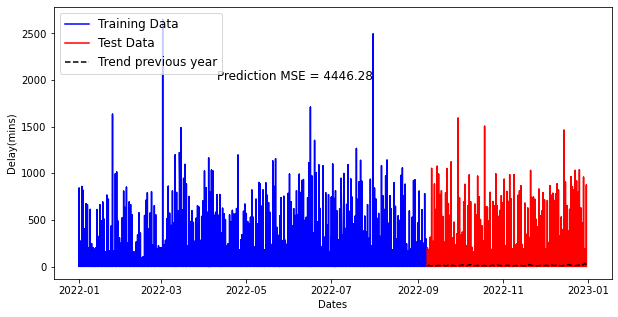

In [185]:
##### getting median delay for each day ######

df_median = data_2021.set_index('Date').groupby(pd.Grouper(freq='d')).median().dropna(how='all')

###### Getting how many flights in every day of 2022 #######

x = data_2022['Date'].value_counts(sort=False, dropna=False)

x = x.sort_index()

mean_vals = []
for i in range(365):
    arr = np.full(x[i], df_median['DEP_DELAY'][i])
    mean_vals.append(arr.tolist())
    
#### Assigning the mean delay value to each flight ########

delay_pred = [item for sublist in mean_vals for item in sublist]


plt.figure(figsize=(10, 5))

plt.plot(data_2022.Date[:train_len],
            delay_time[:train_len],
            'b-',
            label="Training Data")

plt.plot(data_2022.Date[train_len:],
            delay_time[train_len:],
            'r-',
            label="Test Data")

plt.plot(data_2022.Date[train_len:],
            delay_pred[train_len:],
            'k--',
            label="Trend previous year")

plt.text(data_2022.Date[train_len],
         2000,
         "Prediction MSE = " + str(np.round(mean_squared_error(delay_time[train_len:],
                                                                  delay_pred[train_len:]), 2)),
         fontsize=12)

plt.xlabel("Dates")
plt.ylabel("Delay(mins)")

plt.legend(fontsize=12, loc=2)

plt.show()